## Importing libraries

In [1]:
import pandas as pd
import ast
import numpy as np
import re

## Loading Data Set

In [2]:
dd_delivery = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Internship 2024 Sample Docs\diminos_data_v2\deliveries.csv")

In [3]:
dd_items = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Internship 2024 Sample Docs\diminos_data_v2\order_items.csv")

In [4]:
dd_order = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Internship 2024 Sample Docs\diminos_data_v2\orders.csv")

In [5]:
dd_pro = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Internship 2024 Sample Docs\diminos_data_v2\products.csv")

In [6]:
dd_delivery.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [7]:
dd_items.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [8]:
dd_order.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [9]:
dd_pro.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [10]:
dd_items['items_ordered'] = dd_items['items_ordered'].apply(ast.literal_eval)

In [11]:
dd_items = dd_items.explode('items_ordered').reset_index(drop=True)

In [12]:
dd_items

,order_id,items_ordered
0,321230114,p_025
1,321230114,p_032
2,321230114,p_037
3,321230115,p_017
4,321230115,p_012
...,...,...
1158888,321684448,p_007
1158889,321684448,p_003
1158890,321684448,p_037
1158891,321684449,p_022


## Merging Data Frames

In [13]:
merged_1 = pd.merge(dd_delivery, dd_items, how="outer", on = 'order_id' )

In [14]:
merged_2 = pd.merge(merged_1, dd_order, how="outer", on = 'order_id' )

In [15]:
merged_data = pd.merge(merged_2, dd_pro, how = 'outer', left_on= 'items_ordered',right_on="item_id" )

In [16]:
merged_data.drop('items_ordered', axis = 1, inplace = True)

### Type Casting

In [17]:
merged_data['time_stamp'] = merged_data['time_stamp'].astype('datetime64[ns]')

In [18]:
merged_data['order_placed_at'] = merged_data['order_placed_at'].astype('datetime64[ns]')

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476679 entries, 0 to 3476678
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   order_id         int64         
 1   time_stamp       datetime64[ns]
 2   status           object        
 3   order_placed_at  datetime64[ns]
 4   item_id          object        
 5   category         object        
 6   Item             object        
 7   Size             object        
 8   Price            int64         
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 265.2+ MB


## Analysis

##### 1) What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [20]:
pending = merged_data[merged_data['status']== 'Pending']

In [21]:
delivered = merged_data[merged_data['status']== 'Delivered']

In [22]:
time = ((delivered['time_stamp'].values - pending['time_stamp'].values)/ pd.Timedelta('1s') / 60)

In [23]:
delivered['Delivery_in_mins'] = time

C:\Users\hi\AppData\Local\Temp\ipykernel_8108\685693908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['Delivery_in_mins'] = time


In [24]:
avg_time = time.mean().round(2)

In [25]:
print(f"The Average Delivery time: {avg_time} minutes")

The Average Delivery time: 20.65 minutes


### 2) What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [26]:
percentile_99 = np.percentile(time,99)

In [27]:
print(f"99th percentile Delivery Time (in minutes): {percentile_99.round(2)} minutes")

99th percentile Delivery Time (in minutes): 30.89 minutes


### 3) Which metric is the better choice to determine the stores performance based on Delivery Time?

In [28]:
print(f"Mean : {time.mean().round(2)},\nMedian : {np.median(time).round(2)},\n99th Percentile: {np.percentile(time,99).round(2)},\n95th Percentile: {np.percentile(time,95).round(2)}")

Mean : 20.65,
Median : 19.98,
99th Percentile: 30.89,
95th Percentile: 26.35


### 4) What is the order id with the maximum delivery time?

In [29]:
delivered[delivered['Delivery_in_mins'] == delivered['Delivery_in_mins'].max()]

,order_id,time_stamp,status,order_placed_at,item_id,category,Item,Size,Price,Delivery_in_mins
1146008,321629049,2023-09-21 16:52:49.724687723,Delivered,2023-09-21 15:49:55,p_037,Veg,Coke,Regular,71,62.912078
1600838,321629049,2023-09-21 16:52:49.724687723,Delivered,2023-09-21 15:49:55,p_029,Non Veg,Pepper Barbecue Chicken,Medium,419,62.912078
1858259,321629049,2023-09-21 16:52:49.724687723,Delivered,2023-09-21 15:49:55,p_022,Non Veg,Non Veg Supreme,Regular,365,62.912078


### 5) How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [30]:
jan_1st = "2024-01-01"
Feb_1st = "2024-02-01"

In [31]:
pending[(pending['time_stamp'] >= jan_1st) & (pending['time_stamp'] < Feb_1st) & (pending['Item'] != "Coke")]

,order_id,time_stamp,status,order_placed_at,item_id,category,Item,Size,Price
62628,321672182,2024-01-01 02:32:03,Pending,2024-01-01 02:32:03,p_025,Non Veg,Chicken Dominator,Regular,365
62631,321672233,2024-01-01 08:43:15,Pending,2024-01-01 08:43:15,p_025,Non Veg,Chicken Dominator,Regular,365
62634,321672299,2024-01-01 13:13:38,Pending,2024-01-01 13:13:38,p_025,Non Veg,Chicken Dominator,Regular,365
62637,321672304,2024-01-01 13:47:40,Pending,2024-01-01 13:47:40,p_025,Non Veg,Chicken Dominator,Regular,365
62640,321672309,2024-01-01 14:19:24,Pending,2024-01-01 14:19:24,p_025,Non Veg,Chicken Dominator,Regular,365
...,...,...,...,...,...,...,...,...,...
3476664,321684344,2024-01-31 16:49:59,Pending,2024-01-31 16:49:59,p_035,Non Veg,Chicken Pepperoni,Medium,609
3476667,321684386,2024-01-31 18:34:03,Pending,2024-01-31 18:34:03,p_035,Non Veg,Chicken Pepperoni,Medium,609
3476670,321684398,2024-01-31 19:05:01,Pending,2024-01-31 19:05:01,p_035,Non Veg,Chicken Pepperoni,Medium,609
3476673,321684401,2024-01-31 19:16:36,Pending,2024-01-31 19:16:36,p_035,Non Veg,Chicken Pepperoni,Medium,609


### 6) How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?
*
This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.

In [32]:
len(delivered[(delivered['order_placed_at'] >= jan_1st) & (delivered['order_placed_at'] < Feb_1st) & (delivered['Delivery_in_mins'] > 30)]['order_id'].unique())

162

### 7) What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [33]:
delivered[(delivered['order_placed_at'] >= "2023-01-01") & (delivered['order_placed_at'] < "2024-01-01") & (delivered['Delivery_in_mins'] > 30)]["Price"].sum()

1826393

### 8)In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [34]:
delivered['Order_year'] = delivered['order_placed_at'].dt.year

C:\Users\hi\AppData\Local\Temp\ipykernel_8108\1571650666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['Order_year'] = delivered['order_placed_at'].dt.year


In [35]:
delivered[delivered['Delivery_in_mins'] > 30].groupby('Order_year')["Price"].sum().sort_values(ascending = False)

Order_year
2023    1826393
2021    1791568
2022    1664113
2024     145669
2020      96688
Name: Price, dtype: int64

### 9)How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [36]:
delivered[delivered['Delivery_in_mins'] <= 30]["Price"].sum()

402310056

### 10) (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

In [37]:
delivered['hour'] = delivered['order_placed_at'].dt.hour

C:\Users\hi\AppData\Local\Temp\ipykernel_8108\796387728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['hour'] = delivered['order_placed_at'].dt.hour


In [38]:
delivered['date']  = delivered['order_placed_at'].dt.date

C:\Users\hi\AppData\Local\Temp\ipykernel_8108\1815212841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['date']  = delivered['order_placed_at'].dt.date


In [39]:
delivered

,order_id,time_stamp,status,order_placed_at,item_id,category,Item,Size,Price,Delivery_in_mins,Order_year,hour,date
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12-11 00:01:29,p_025,Non Veg,Chicken Dominator,Regular,365,17.738319,2020,0,2020-12-11
5,321230125,2020-12-11 03:24:01.429084233,Delivered,2020-12-11 03:02:34,p_025,Non Veg,Chicken Dominator,Regular,365,21.457151,2020,3,2020-12-11
8,321230132,2020-12-11 04:04:51.192638615,Delivered,2020-12-11 03:47:25,p_025,Non Veg,Chicken Dominator,Regular,365,17.436544,2020,3,2020-12-11
11,321230136,2020-12-11 04:44:40.175141823,Delivered,2020-12-11 04:19:56,p_025,Non Veg,Chicken Dominator,Regular,365,24.736252,2020,4,2020-12-11
14,321230174,2020-12-11 08:22:09.140170569,Delivered,2020-12-11 08:04:24,p_025,Non Veg,Chicken Dominator,Regular,365,17.752336,2020,8,2020-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476666,321684344,2024-01-31 17:07:16.198293573,Delivered,2024-01-31 16:49:59,p_035,Non Veg,Chicken Pepperoni,Medium,609,17.286638,2024,16,2024-01-31
3476669,321684386,2024-01-31 18:53:03.984373283,Delivered,2024-01-31 18:34:03,p_035,Non Veg,Chicken Pepperoni,Medium,609,19.016406,2024,18,2024-01-31
3476672,321684398,2024-01-31 19:24:43.512111920,Delivered,2024-01-31 19:05:01,p_035,Non Veg,Chicken Pepperoni,Medium,609,19.708535,2024,19,2024-01-31
3476675,321684401,2024-01-31 19:33:01.304076752,Delivered,2024-01-31 19:16:36,p_035,Non Veg,Chicken Pepperoni,Medium,609,16.421735,2024,19,2024-01-31


In [40]:
per_hour = delivered.groupby(['hour','date'])['order_placed_at'].count().reset_index()

In [41]:
per_hour.columns = ['hour', 'date', 'orders']

In [42]:
per_hour

,hour,date,orders
0,0,2020-12-11,7
1,0,2020-12-12,18
2,0,2020-12-13,23
3,0,2020-12-14,11
4,0,2020-12-15,8
...,...,...,...
27449,23,2024-01-27,43
27450,23,2024-01-28,31
27451,23,2024-01-29,16
27452,23,2024-01-30,19


In [43]:
per_hour_data = pd.pivot_table(data=per_hour, values='orders', index='date',columns='hour')

In [44]:
per_hour_data

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2020-12-11,7.0,9.0,12.0,20.0,15.0,10.0,24.0,31.0,78.0,26.0,...,58.0,76.0,68.0,99.0,62.0,81.0,26.0,29.0,42.0,18.0
2020-12-12,18.0,11.0,13.0,29.0,12.0,29.0,7.0,38.0,14.0,31.0,...,53.0,73.0,81.0,54.0,64.0,96.0,21.0,79.0,49.0,42.0
2020-12-13,23.0,13.0,12.0,21.0,4.0,10.0,20.0,32.0,34.0,26.0,...,48.0,44.0,35.0,55.0,73.0,37.0,35.0,18.0,47.0,11.0
2020-12-14,11.0,28.0,10.0,9.0,11.0,29.0,37.0,66.0,65.0,51.0,...,39.0,73.0,84.0,80.0,99.0,52.0,52.0,48.0,26.0,26.0
2020-12-15,8.0,25.0,7.0,16.0,22.0,14.0,12.0,44.0,52.0,78.0,...,60.0,65.0,60.0,77.0,67.0,43.0,38.0,57.0,35.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27,23.0,15.0,16.0,9.0,28.0,10.0,24.0,27.0,45.0,41.0,...,51.0,36.0,54.0,47.0,44.0,27.0,29.0,19.0,21.0,43.0
2024-01-28,10.0,18.0,22.0,29.0,3.0,20.0,32.0,28.0,45.0,63.0,...,69.0,83.0,78.0,69.0,47.0,57.0,47.0,29.0,37.0,31.0
2024-01-29,18.0,3.0,29.0,24.0,12.0,3.0,14.0,28.0,29.0,32.0,...,129.0,76.0,144.0,227.0,102.0,49.0,32.0,41.0,13.0,16.0


In [45]:
per_hour_data.fillna(0,inplace=True)

<Axes: >

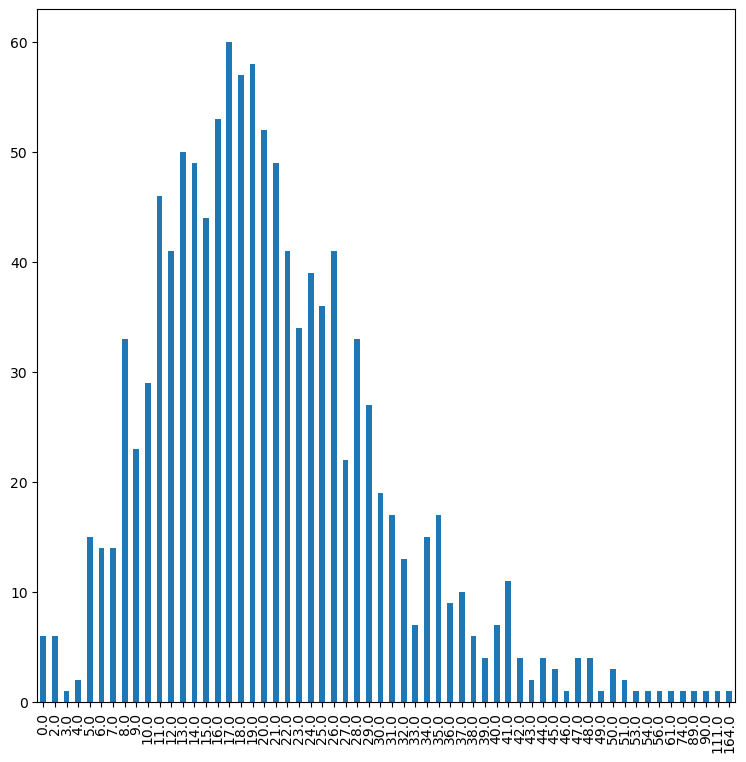

In [46]:
per_hour_data[0].value_counts().sort_index().plot(kind = 'bar', figsize = (9,9))

## Orders per hour is following Poison Distribution